# Homework 2 Key

In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pylab as plt
import pandas as pd


# Question 1

Epidemiologists are interested in studying the sexual behavior of individuals at risk for HIV infection. Suppose 1500 gay men were surveyed and each was asked how many risky sexual encounters he had in the previous 30 days. Let $n_i$ denote the number of respondents reporting $i$ encounters, for $i = 1, \ldots , 16$. The DataFrame below contains these reponses:

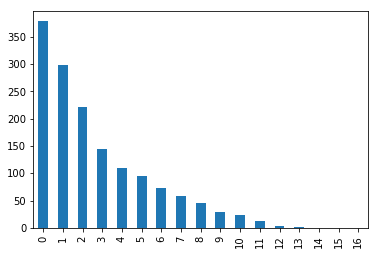

In [2]:
encounters = pd.DataFrame({'count': np.arange(17),
                          'freq': [379, 299, 222, 145, 109, 95, 73, 59,
                                  45, 30, 24, 12, 4, 2, 0, 1, 1]})

encounters.freq.plot.bar()

These data are poorly fitted by a Poisson model. It is more realistic to assume that the respondents comprise three groups. First, there is a group of people who, for whatever reason, report zero risky encounters even if this is not true. Suppose a respondent has probability $\alpha$ of belonging to this group. 

With probability $\beta$, a respondent belongs to a second group representing typical behavior. Such people respond truthfully, and their numbers of risky encounters are assumed to follow a $\text{Poisson}(\mu)$ distribution. 

Finally, with probability $1 − \alpha − \beta$, a respondent belongs to a high-risk group. Such people respond truthfully, and their numbers of risky encounters are assumed to follow a $\text{Poisson}(\lambda)$ distribution. 

The parameters in the model are $\alpha, \beta, \mu$ and $\lambda$. At the $t^{th}$ iteration of EM, we use $\theta^{(t)} = (\alpha^{(t)}, \beta^{(t)}, \mu^{(t)}, \lambda^{(t)})$ to denote the current parameter values. The likelihood of the observed data is given by:

$$L(\theta | n_0, \ldots, n_{16}) \propto \prod_{i=0}^{16} \left[ \frac{\pi_i(\theta)}{i!} \right]^{n_i}$$

where $\pi_i(\theta) = \alpha 1_{(i=0)} + \beta \mu^i \exp(-\mu) + (1-\alpha - \beta) \lambda^i \exp(-\lambda)$.

The observed data are in the `encounters` table above; the *complete* data may be construed to be $(n_{z,0}, n_{t,0}, n_{p,0}), \ldots, (n_{z,16}, n_{t,16}, n_{p,16})$, where $k = z, t, p$ correspond to zero, typical and promiscuous groups, respectively. That is, $n_0 = n_{z,0} + n_{t,0} + n_{p,0}$, and so on. Let $N = \sum_{i=0}^{16} n_i = 1500$.

Also define:

$$\begin{align}
z_0(\theta) &=& \frac{\alpha}{\pi_0(\theta)} \\
t_i(\theta) &=& \frac{\beta \mu^i \exp(-\mu)}{\pi_i(\theta)} \\
p_i(\theta) &=& \frac{(1-\alpha-\beta)\lambda^i \exp(-\lambda)}{\pi_i(\theta)}
\end{align}$$

which correspond to probabilities that respondents with $i$ risky encounters belong to various groups.

a. Show that the EM algorithm provides the following updates:

$$\begin{align}
\alpha^{(t+1)} &=& \frac{n_0 z_0(\theta^{(t)})}{N} \\
\beta^{(t+1)} &=& \sum_i \frac{n_i t_i(\theta^{(t)})}{N} \\
\mu^{(t+1)} &=& \frac{\sum_i i n_i t_i(\theta^{(t)})}{\sum_i n_i t_i(\theta^{(t)})} \\
\lambda^{(t+1)} &=& \frac{\sum_i i n_i p_i(\theta^{(t)})}{\sum_i n_i p_i(\theta^{(t)})}
\end{align}$$


b. Estimate the parameters of the model using the observed data.

# Answer to Question 1a

We begin by introducing class indicator variable $k_i$ (formerly $z_i$ in the EM class notes) which takes on values $z,t,p$ and evaluate the complete log-likelihood function such that we have

$$l(n|\theta) = \sum_i \text{log} \sum_{k_i}p(n_i, k_i | \theta)$$

allowing $\theta = \{\alpha, \beta, \mu, \lambda\}$. Introducing densities for the values of $k$ at number of encounters $i$ as $z_i, t_i, p_i$, we can redefine the complete log-likelihod function as 

$$l(n|\theta) = \sum_i \text{log}\left(\frac{z_i p(n_i, k_i | \theta)}{z_i} + \frac{t_i p(n_i, k_i | \theta)}{t_i} + \frac{p_i p(n_i, k_i | \theta)}{p_i}\right)$$

Expanding and noting that $z_i = 0 ~~~ \forall i \ne 0$, we have

$$l(n|\theta) = n_0\left[z_0 \text{log}\left(\frac{\alpha}{z_0}\right) + t_0 \text{log}\left(\frac{\beta e^{-\mu}}{t_0}\right) + p_0 \text{log}\left(\frac{(1-\alpha-\beta)e^{-\lambda}}{p_0}\right) + \sum_{i = 1}^{16} n_i\left[t_i \text{log}\left(\frac{\beta e^{-\mu}\mu^i}{t_i}\right) + p_i \text{log}\left(\frac{(1-\alpha-\beta)e^{-\lambda}\lambda^i}{p_i}\right) \right] \right]$$


We now can take the derivative with respect to $\alpha, \beta, \mu, \lambda$:

$$\frac{\partial l(n|\theta)}{\partial \alpha} = \frac{n_0 z_0}{\alpha} - \sum_{i=0}^{16}\frac{n_i p_i}{1-\alpha-\beta}$$

Solving for $\alpha$, we have 

$$\hat{\alpha} = \frac{n_0 z_0(1-\beta)}{\sum_{i=0} n_i p_i + n_0z_0}$$


$$\frac{\partial l(n|\theta)}{\partial \beta} = \sum_{i=0}^{16}\frac{n_i t_i}{\beta} - \sum_{i=0}^{16}\frac{n_i p_i}{1-\alpha-\beta}$$


Solving for $\beta$
$$\hat{\beta} = \frac{(1-\alpha)\sum_{i=0}^{16}n_i t_i}{\sum_{i=0} n_i p_i + n_i t_i}$$


$$\frac{\partial l(n|\theta)}{\partial \mu} = -\sum_{i=0}^{16}n_i t_i + \sum_{i=1}^{16}\frac{i n_i t_i}{\mu}$$

Solving for $\mu$:
$$\mu = \frac{\sum_{i=1}^{16}i n_i t_i}{\sum_{i=0}^{16} n_i t_i} = \frac{\sum_{i=0}^{16}i n_i t_i}{\sum_{i=0}^{16}n_i t_i}$$


$$\frac{\partial l(n|\theta)}{\partial \lambda} = -\sum_{i=0}^{16}n_i p_i + \sum_{i=1}^{16}\frac{i n_i p_i}{\lambda}$$

Solving for $\lambda$:
$$\lambda = \frac{\sum_{i=0}^{16}i n_i p_i}{\sum_{i=0}^{16}n_i p_i}$$




# Answer to Question 1b
To implement the EM algorithm, we write functions that take care of the E- and M-steps separately.  

For the E-step, we want to compute estimates of the probabilities of group membership for our latent variable. Here, the latent variable is whether the person is classified as a zero responder, or has typical or promiscuous behavior. The probabilities of group membership are defined above using the $z_0(\theta)$, $t_i(\theta)$, and $p_i(\theta)$ functions.  

For the E-step, we simply write a function that evaluates these expressions given both the observed data and guesses at the parameter values. The function returns the group membership probabilities for each of the 16 response categories in the observed data.

In [3]:
# Define functions necessary for computing group membership probabilities
def pi(i, α, β, μ, λ):
    return α * int((i==0)) + β * (μ ** i) * np.exp(-μ) + (1 - α - β) * (λ ** i) * np.exp(-λ)

# Zero responder
def z_i(i, α, β, μ, λ):
    if i==0:
        return α/pi(i=0, α=α, β=β, μ=μ, λ=λ)
    if i > 0: 
        return 0

# Typical behavior
def t_i(i, α, β, μ, λ):
    return (β * (μ ** i) * np.exp(-μ))/pi(i, α=α, β=β, μ=μ, λ=λ)

# Promiscuous behavior
def p_i(i, α, β, μ, λ):
    return ((1 - α - β) * (λ ** i) * np.exp(-λ))/pi(i, α=α, β=β, μ=μ, λ=λ)

In [4]:
def e_step(x, α, β, μ, λ):
    indexes = np.arange(x.__len__())
    
    # Probabilities of group membership
    z_wt = [z_i(i, α, β, μ, λ) for i in indexes] # zero
    
    t_wt = [t_i(i, α, β, μ, λ) for i in indexes] # typical
    
    p_wt = [p_i(i, α, β, μ, λ) for i in indexes] # promiscuous
    
    # Return the weights
    return z_wt, t_wt, p_wt

For the M-step, we want to update the parameter values by making an educated guess at an improved value. This is accomplished by computing the estimates of the parameters that maximize the likelihood function. These are the estimates given in the problem prompt and discussed in part (a). The M-step function takes in the observed data the group weights from the E-step as arguments and computes the updates for parameters $(\alpha, \beta, \mu, \lambda)$.

In [5]:
# Define additional variables
n0 = encounters.freq[0]
N = np.sum(encounters.freq)

In [6]:
# Takes in data and the weights from e_step
def m_step(x, w):
    # Explicitly define the weights for each group
    z,t,p = w
    
    i = np.arange(x.__len__())
    
    # Updates
    alpha = (n0 * z[0])/N
    
    beta = np.sum((x * t)/N)
    
    mu = np.sum(i * x * t)/np.sum(x * t)
    
    lam = np.sum(i * x * p)/np.sum(x * p)
    
    return alpha, beta, mu, lam

Now, we combine the E- and M-steps to actually implement the EM algorithm. Essentially, we start with initial parameter value guesses and iterate between the steps above until convergence. We will start with initial guesses of $\alpha_0 = 0.1$ and $\beta_0 = 0.7$, indicating that we believe 10% of responders will say 0 risky encounters regardless, 70% will exhibit typical behavior, and 20% will exhibit promiscuous behavior. Our initial guesses for the means of the typical and promiscuous groups will be one and seven, respectively. Once all four parameters have reached the convergence criteria (changing by less than 1e-5 between iterations), we will consider the algorithm to be complete.

In [7]:
def em_alg(alpha0, beta0, mu0, lambda0, x=encounters.freq):
    
    # Initialize values
    alpha = alpha0
    beta = beta0
    mu = mu0
    lam = lambda0

    # Stopping criterion
    crit = 1e-5

    # Convergence flag
    converged = False

    # Loop until converged
    while not converged:

        # E-step
        w = e_step(x, alpha, beta, mu, lam)
        # M-step
        α_new, β_new, μ_new, λ_new = m_step(x, w)

        # Check convergence
        converged = ((np.abs(α_new - alpha) < crit) 
                     & (np.abs(β_new - beta) < crit)
                     & (np.abs(μ_new - mu) < crit)
                     & (np.abs(λ_new - lam) < crit))
        alpha, beta, mu, lam = α_new, β_new, μ_new, λ_new
        
    return alpha, beta, mu, lam

In [8]:
em_alg(alpha0 = .1, beta0 = .7, mu0 = 1, lambda0 = 7)

(0.12215319624493973,
 0.5625417622037108,
 1.4673935938188942,
 5.938788078596986)

So we end up with the following parameter estimates from the EM algorithm:  
$\hat{\alpha} = .12$ (Roughly 12% of responders report 0 risky encounters regardless.)  
$\hat{\beta} = .56$ (Roughly56% of responders exhibit typical behavior)  
(Roughly $(1 - \hat{\alpha}-\hat{\beta})*100 =$ 32% of responders exhibit promiscuous behavior)  
$\hat{\mu} = 1.47$ (The average number of risky encounters for those with typical behavior)  
$\hat{\lambda} = 5.94$ (The average number of risky encounters for those with promiscuous behavior)  

# Question 2

Suppose $y$ has a binomial distribution with parameters $n$ and $p$, and we are interested in the log-odds value $\theta = \log(p/(1 − p))$. Our prior for $\theta$ is that $\theta \sim N(\mu, \sigma^2)$. It follows that the posterior density of $\theta$ is given, up to a proportionality constant, by:

$$\pi(\theta | y) \propto \frac{\exp(y\theta)}{(1 + exp(\theta))^n} \exp\left[\frac{-(\theta − \mu)^2}{2\sigma^2}\right]$$

For example, suppose we are interested in learning about the probability that a possibly-biased coin lands heads when tossed. *A priori* we believe that the coin is fair, so we assign $\theta$ a $N(0,.25)$ prior. We toss the coin $n = 5$ times and obtain $y = 5$ heads.

1. Using a normal approximation to the posterior density, compute the probability that the coin is biased toward heads (i.e., that θ is positive).
2. Using the prior density as a proposal density, design a rejection algorithm for sampling from the posterior distribution. Using simulated draws from your algorithm, approximate the probability that the coin is biased toward heads.
3. Using the prior density as a proposal density, simulate values from the posterior distribution using the SIR algorithm. Approximate the probability that the coin is biased toward heads.

## Answer to Question 2.1

By expanding $h(\theta|y) = log(f(y|\theta)p(\theta)$ using a first order Taylor-series expansion, we note that an approximation to the posterior density of $\theta$ is given by a normal distribution with mean at the MLE of $\theta$ and variance $\Sigma = [-h''(\hat{\theta}|y)]^{-1}$. We numerically estimate these quantities using the scipy minimize function.



In [9]:
# 2a - normal approximation
from scipy.optimize import minimize

mu = 0
sigma = 0.5
# exact posterior density 
def post_theta(theta, y = 5,n = 5):
    post_prob = np.log(np.exp(y*theta)/(1+np.exp(theta))**n * np.exp(-1*(theta-mu)**2 / (2*sigma**2)))
    return post_prob

post_theta_min = lambda *args: -post_theta(*args)
init_value = 1
opt = minimize(post_theta_min, init_value, method='L-BFGS-B')
mode = opt.x
var = opt.hess_inv.todense()[0][0]
print("posterior mode of theta: " + str(mode)) 
print("posterior variance of theta: " + str(var))

posterior mode of theta: [ 0.47831318]
posterior variance of theta: 0.193040735116


In [10]:
# sample from normal distribution with mean and variance given by approximation
n_samples = 10000
norm_samples = np.random.normal(mode, np.sqrt(var), n_samples)
p_biased = np.sum(norm_samples > 0)/n_samples
print("the posterior estimate that the coin is based towards head is " + str(p_biased))

the posterior estimate that the coin is based towards head is 0.8639


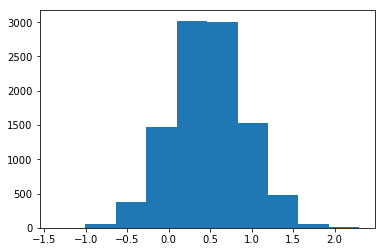

In [11]:
_ = plt.hist(norm_samples)

In [12]:
# exact posterior density 
def post_theta(theta,y,n,mu,sigma):
    post_prob = np.exp(y*theta)/(1+np.exp(theta))**n * np.exp(-1*(theta-mu)**2 / (2*sigma**2))
    return post_prob

theta = 1.5
y = 5
n = 5
mu = 0 
sigma = 0.5

# 
post_theta(theta,y,n,mu,sigma)

0.004057994512227275

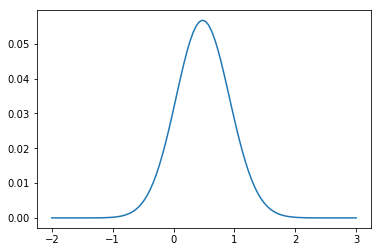

In [13]:
theta_seq = pd.Series(np.linspace(-2, 3, num = 100))
post_true = pd.Series([post_theta(theta,y,n,mu,sigma) for theta in theta_seq])

plt.plot(theta_seq, post_true)

In [14]:
# find area underneath posterior for theta > 0
const = np.sum(post_true)
np.sum(post_true[theta_seq >0])/const

0.8663271771924194

In [15]:
# find expected value/variance
const = np.sum(post_true)
mo_1 = np.sum(post_true*theta_seq/const)
mo_2 = np.sum(post_true*theta_seq**2/const)
var = mo_2 - mo_1**2
print("True posterior mean of theta: " + str(mo_1))
print("True posterior variance of theta: " + str(var))

True posterior mean of theta: 0.48317345953076124
True posterior variance of theta: 0.19478243146260318


# Answer to Question 2.2

For the rejection algorithm, we want to define an enveloping distribution $g$ from which we will sample. Values sampled from $g$ will be accepted or rejected based on the truth, $f$. We will also accept $g$ with some probability if $u_i < f(x_i)/cg(x_i)$, where $u_i$ is a draw from a random uniform distribution and $c$ is an appropriately chosen constant. We want to choose $c$ such that 

$$\cfrac{f(\theta|y)}{g(\theta)} \le c\ \bigg( \text{or equivalently } \log[f(\theta|y)] - \log[g(\theta)] \le c'\bigg)$$

We are given that the posterior is proportional to the following:  
$$\pi(\theta | y) \propto \frac{\exp(y\theta)}{(1 + exp(\theta))^n} \exp\left[\frac{-(\theta − \mu)^2}{2\sigma^2}\right]$$  

which means on the log scale we have:  
$$log(\pi(\theta | y)) \propto y\theta - n\ log(1 + exp(\theta)) - \frac{(\theta − \mu)^2}{2\sigma^2}$$  

Belowe we define a function to compute the log-posterior given $\theta$ and the data ($n=5,\ y=5$)

In [17]:
# Posterior on log scale
def logpost(theta, n, y):
    
    mu, sig = 0, np.sqrt(.25)
    
    lpost = y*theta - n*np.log(1 + np.exp(theta)) - ((theta - mu)**2)/(2*(sig**2))
    
    return lpost

Now, we create a function that will compute the difference between the log-posterior and the log of our proposal density. For this problem, we are considering the prior distribution ($\theta \sim N(0,.25)$) to be the proposal. We maximize this function (by minimizing a negated version of it) to obtain our value of $c$ to use the in rejection sampling algorithm.

In [19]:
from scipy.optimize import minimize
from scipy import stats
def calc_diff(theta, n, y, mu, sig):

    return logpost(theta, n, y) - np.log(stats.norm.pdf(theta, mu, sig))

# Because we want c as an upper bound
calc_diff_min = lambda *args: -calc_diff(*args)

opt = minimize(calc_diff_min, 
                0, 
                args=(5,5,0,np.sqrt(.25)), 
                method='bfgs')
opt

      fun: -0.225783629283967
 hess_inv: array([[ 45057.03046462]])
      jac: array([ -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 57
      nit: 18
     njev: 19
   status: 0
  success: True
        x: array([ 13.3806981])

So the value selected as the upper bound on the difference of the log posteriors is -0.23. Now, we implement the rejection sampling algorithm. First, we draw values of $\theta$ from the proposed $N(0,.25)$ distribution. We then compute the log-posterior and log-normal density associated with $f$ ($\pi$ above) and $g$ (the proposal), respectively. The acceptance probability is calculated to be $log(f) - log(g) + c$. We accept the proposed value if the acceptance probability is greater than a randomly generated uniform random variable.

In [21]:
def reject(post, nsamp, n=5, y=5, mu=0, sig=np.sqrt(.25), c = opt.fun):
    
    # Draw samples from g(theta) ~ N(0,.25) 
    # Using prior density as our proposal
    theta = np.random.normal(mu, sig, size=nsamp)
    
    # Calculate probability under g(theta)
    gvals = np.array([(np.log(stats.norm.pdf(t, loc=mu, scale=sig))) for t in theta])
    
    # Calculate probability under f(theta)
    fvals = np.array([post(t, n=n,y=y) for t in theta])
    
    # Calculate acceptance probability
    p = np.exp(fvals - gvals + c)
    
    return theta[np.random.random(nsamp) < p]

nsamples = 10000
sample = reject(logpost, nsamples)

In [22]:
sample[sample>0].size/sample.size

0.8397565922920892

The estimated probability that the coin is biased is computed above as the simple proportion of accepted samples where $\theta > 0$. Our estimate of the probability of a biased coin based on the rejection algorithm is 0.84. However, we can see that this rejection sampling had a low acceptance rate of just under 5%, which means it may be unreliable

In [24]:
float(sample.size)/nsamples

0.0493

# Answer to Question 2.2

For the sampling importance resampling algorithm, we will work with the posterior on the original scale (i.e. not log-transformed). Again, we use the prior $N(0, .25)$ distribution as our proposal.

In [30]:
# Function for posterior
def post(theta, n, y):
    mu, sig = 0, np.sqrt(.25)
    
    post = np.exp(y*theta)/((1 + np.exp(theta))**n) * np.exp((-(theta - mu)**2) / (2 * sig**2))
    
    return post

The SIR algorithm is performed below. First, we draw values of $\theta$ from the proposal distribution and calculate their associated densities under the proposal. Then, we compute the value of the posterior probability for each of the drawn $\theta$s. The importance weights are defined to be the ratio between the posterior probability and proposal density (i.e. $f/g$). Furthermore, we divide these quotients by the maximum of the $f/g$ to normalize the weights.

In [31]:
mu, sig = 0, np.sqrt(.25)
nsamples = 10000

theta = np.random.normal(mu, sig, size=nsamples)

# Calculate probability under proposal
q_theta = np.array([(stats.norm.pdf(t, loc=mu, scale=sig)) for t in theta])

# Calculate probability under posterior
f_theta = np.array([post(t, n=5,y=5) for t in theta])

# importance weights (on original scale, not log scale)
w = (f_theta / q_theta) / max(f_theta / q_theta)

The SIR algorithmthen converts these weights to probabilities by computing the fractional importance of each weight: $p_i = \frac{w(\theta_i)}{\sum_{i=1}^M w(\theta_i)}$.  

We sample values of $\theta$ in the SIR algorithm according the these computed probabilities. Our estimate of the probability that the coin is biased is computed in the same way here as it was in part (b). That is, by determining the proportion of the SIR $\theta$ draws that were greater than 0. The SIR estimate of this probability is 0.865.

In [32]:
# convert weights to probabilities
p_sir = w/w.sum()

# sample theta values
theta_sir = theta[np.random.choice(range(len(theta)), size=100000, p=p_sir)]

In [33]:
theta_sir[theta_sir>0].size/100000

0.86074

# Question 3

The goal of this problem is to investigate the role of the proposal distribution in a Metropolis-Hastings algorithm designed to simulate from the posterior distribution of the mixture parameter $\delta$. 

1. Simulate 200 realizations from the mixture distribution:
    $$y_i \sim \delta N(7, 0.5^2) + (1-\delta) N(10, 0.5^2)$$
    with $\delta = 0.7$. Plot a histogram of these data. 
2. Implement a random walk M-H algorithm with proposal $\delta^{\prime} = \delta^{(i)} + \epsilon$ with $\epsilon \sim Unif(−1,1)$. 
3. Reparameterize the problem letting $U = \log\left[\frac{\delta}{1 - \delta}\right]$ and $u^{\prime} = u^{(i)} + \epsilon$. Implement a random walk chain in U-space. 
4. Compare the estimates and convergence behavior of the three algorithms.

In part (1), you are asked to simulate data from a distribution with $\delta$ known. For parts (2)–(4), assume $\delta$ is unknown with prior $\delta \sim Unif( 0,1)$. For parts (2)–(4), provide an appropriate plot and a table summarizing the output of the algorithm. 

To facilitate comparisons, use the same number of iterations, random seed, starting values, and burn-in period for all implementations of the algorithm. 

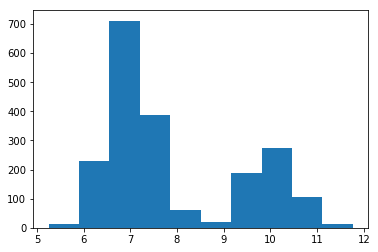

In [35]:
n_samples = 2000
delta = 0.7
d = np.random.binomial(1, delta, n_samples)
norm1 = np.random.normal(7, 0.5, n_samples)
norm2 = np.random.normal(10, 0.5, n_samples)

y = np.where(d > 0, norm1, norm2)
_ = plt.hist(y)

# Answer to Question 3.2

In [36]:
# part 3 - skip part 2
from scipy.stats import norm
lnorm = norm.logpdf

def calc_posterior(delta, y = y, mu1 = 7, mu2 = 10, sigma1 = 0.5, sigma2 = 0.5):
    logp = 0 # f(delta) = 1 --> log(f(delta)) = 0
    logp += sum(np.log(delta*norm.pdf(y, mu1, sigma1) + (1-delta)*norm.pdf(y, mu2, sigma2)))
    return logp

In [37]:
rnorm = np.random.normal
runif = np.random.rand

def metropolis(n_iterations, initial_values, prop_var=1, tune_interval = 100, trans = False):

    n_params = len(initial_values)
            
    # Initial proposal standard deviations
    prop_sd = [prop_var]*n_params
    
    # Initialize trace for parameters
    trace = np.empty((n_iterations+1, n_params))
    
    # Set initial values
    trace[0] = initial_values
        
    # Calculate joint posterior for initial values
    # * allows you to pass in a set of three arguments to the function calc_posterior, instead of reading it as a list
    current_log_prob = calc_posterior(*trace[0]) 
    
    # Initialize acceptance counts
    accepted = [0]*n_params
    acceptance_rate = [0]*n_params
    
    for i in range(n_iterations):
    
        if not i%1000: print('Iteration %i' % i)
    
        # Grab current parameter values
        current_params = trace[i]
    
        for j in range(n_params):
    
            # Get current value for parameter j
            p = trace[i].copy()
    
            # Propose new value
            epsilon = runif(1)
            k = np.random.binomial(1,0.5,1)
            
            if trans == False:
                theta = current_params[j] + k*epsilon + (k-1)*epsilon
            else:
                U = np.log(current_params[j] / (1-current_params[j])) + k*epsilon + (k-1)*epsilon
                theta = 1/(1+np.exp(-U))
                
            # Insert new value 
            p[j] = theta
    
            # Calculate log posterior with proposed value
            proposed_log_prob = calc_posterior(*p)
    
            # Log-acceptance rate
            alpha = proposed_log_prob - current_log_prob # on log-scale --> difference rather than ratio
    
            # Sample a uniform random variate
            u = runif()
    
            # Test proposed value
            if np.log(u) < alpha:
                # Accept
                trace[i+1,j] = theta # accept proposed value of theta
                current_log_prob = proposed_log_prob
                accepted[j] += 1 # increment the number of values of theta accepted
            else:
                # Reject
                trace[i+1,j] = trace[i,j] # copy last parameter value as current value
            
            # change proposal scale (prop_sd) based on acceptance rate (alpha)
            # as alpha increases, more are accepted --> increase proposal sd
            
            if not (i+1) % tune_interval:
                acceptance_rate[j] = accepted[j] / tune_interval
                
                if acceptance_rate[j]<0.2:
                    prop_sd[j] *= 0.9
                elif acceptance_rate[j] > 0.5:
                    prop_sd[j] *=1.1

                accepted[j] = 0    
                    
            
                
    return trace, acceptance_rate

In [41]:
n_iter = 25000
trace, acc = metropolis(n_iter, [0.7])

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 10000
Iteration 11000
Iteration 12000
Iteration 13000
Iteration 14000
Iteration 15000
Iteration 16000
Iteration 17000
Iteration 18000
Iteration 19000
Iteration 20000
Iteration 21000
Iteration 22000
Iteration 23000
Iteration 24000


In [42]:
acc

[0.02]

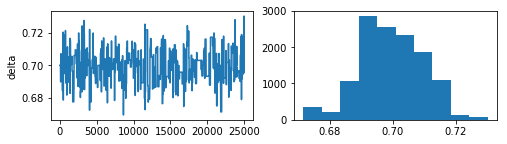

In [43]:
for param, samples in zip(['delta'], trace.T):
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].plot(samples)
    axes[0].set_ylabel(param)
    axes[1].hist(samples[int(len(samples)/2):])

Looking at this plot, we could've sampled for longer for better mixing. 

# Answer to Question 3.3 

In [44]:
trace_trans, acc_trans = metropolis(n_iter, [0.7], trans=True)

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Iteration 10000
Iteration 11000
Iteration 12000
Iteration 13000
Iteration 14000
Iteration 15000
Iteration 16000
Iteration 17000
Iteration 18000
Iteration 19000
Iteration 20000
Iteration 21000
Iteration 22000
Iteration 23000
Iteration 24000


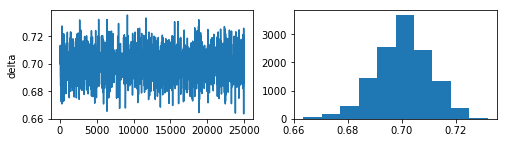

In [45]:
for param, samples in zip(['delta'], trace_trans.T):
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))
    axes[0].plot(samples)
    axes[0].set_ylabel(param)
    axes[1].hist(samples[int(len(samples)/2):])

In [47]:
acc_trans # acceptance rate tripled to 0.13

[0.13]

# Answer to Question 3.4

While both metropolis algorithms result in posterior densities with similar modes, the distribution of the second (random walk in U-space) is more highly concentrated on the central values of the distribution than the first. Moreover, the trace looks significantly less autocorrelated for the U-space random walk than the standard random walk. This contributes to the U-space random walk with an acceptance rate that is three times higher. 

# Question 4

Carlin (1992) considers a Bayesian approach to meta-analysis, and includes the following examples of 22 trials of beta-blockers to prevent mortality after myocardial infarction. These data are given below.

In one possible random effects model we assume the true baseline mean (on a log-odds scale) $m_i$ in a trial $i$
is drawn from some population distribution. Let $r^C_i$ denote number of events in the control group in trial $i$, and $r^T_i$ denote events under active treatment in trial $i$. Our model is:

$$\begin{aligned}
r^C_i &\sim \text{Binomial}\left(p^C_i, n^C_i\right) \\
r^T_i &\sim \text{Binomial}\left(p^T_i, n^T_i\right) \\
\text{logit}\left(p^C_i\right) &= \mu_i \\
\text{logit}\left(p^T_i\right) &= \mu_i + \delta \\
\mu_i &\sim \text{Normal}(m, s).
\end{aligned}$$

In this case, we want to make inferences about the population effect $m$, and the predictive distribution for the effect $\delta_{\text{new}}$ in a new trial. 

This particular model uses a random effect for the population mean, and a fixed effect for the treatment effect. There are 3 other models you could fit to represent all possible combinations of fixed or random effects for these two parameters.

Build all 4 models to estimate the treatment effect in PyMC3 and 

1. use convergence diagnostics to check for convergence in each model 
2. use posterior predictive checks to compare the fit of the models
3. use DIC to compare the models as approximations of the true generating model

Which model would you select and why?

In [ ]:
from pymc3 import Normal, MvNormal, Binomial
r_t_obs = [3, 7, 5, 102, 28, 4, 98, 60, 25, 138, 64, 45, 9, 57, 25, 33, 28, 8, 6, 32, 27, 22]
n_t_obs = [38, 114, 69, 1533, 355, 59, 945, 632, 278,1916, 873, 263, 291, 858, 154, 207, 251, 151, 174, 209, 391, 680]
r_c_obs = [3, 14, 11, 127, 27, 6, 152, 48, 37, 188, 52, 47, 16, 45, 31, 38, 12, 6, 3, 40, 43, 39]
n_c_obs = [39, 116, 93, 1520, 365, 52, 939, 471, 282, 1921, 583, 266, 293, 883, 147, 213, 122, 154, 134, 218, 364, 674]
N = len(n_c_obs)
obs = np.arange(0, N, 1)

In [48]:
# 4 models: 
# 1. random population mean, fixed treatment effect 
# 2. fixed population mean, fixed treatment effect 
# 3. fixed population mean, random treatment effect 
# 4. random population mean, random treatment effect 

In [ ]:
# model 1: random mu_i, fixed delta
with pm.Model() as model1:
    m = pm.Normal("m", 0, sd = 100)
    sd_mu = pm.HalfCauchy("sd_mu",5)
    delta = pm.Normal("delta", 0, sd = 100)
    mu = pm.Normal("mu", m, sd = sd_mu, shape = N)
    pc = pm.math.invlogit(mu)
    pt = pm.math.invlogit(mu + delta)
    like_c = pm.Binomial("rc", np.array(n_c_obs), pc, observed = np.array(r_c_obs))
    like_t = pm.Binomial("rt", np.array(n_t_obs), pt, observed = np.array(r_t_obs)) 

# model 2: fixed mu, fixed delta
with pm.Model() as model2:
#     m = pm.Normal("m", 0, sd = 100)
    delta = pm.Normal("delta", 0, sd = 100)
    mu = pm.Normal("mu", 0, sd = 100)
    pc = pm.math.invlogit(mu)
    pt = pm.math.invlogit(mu + delta)
    like_c = pm.Binomial("rc", np.array(n_c_obs), pc, observed = np.array(r_c_obs))
    like_t = pm.Binomial("rt", np.array(n_t_obs), pt, observed = np.array(r_t_obs))    
    
# model 3: fixed mu, random delta
with pm.Model() as model3:
#     m = pm.Normal("m", 0, sd = 100)
    mu_delta = pm.Normal("mu_delta", 0, 100)
#     sd_delta = pm.HalfCauchy("sd_delta", 5)
    delta = pm.Normal("delta", mu_delta, sd = 10, shape = N)
    mu = pm.Normal("mu", 0, sd = 100)
    pc = pm.math.invlogit(mu)
    pt = pm.math.invlogit(mu + delta)
    like_c = pm.Binomial("rc", np.array(n_c_obs), pc, observed = np.array(r_c_obs))
    like_t = pm.Binomial("rt", np.array(n_t_obs), pt, observed = np.array(r_t_obs)) 
    
# model 4: random mu, random delta    
with pm.Model() as model4:
    m = pm.Normal("m", 0, sd = 100)
    sd_mu = pm.HalfCauchy("sd_mu",5)    
    mu_delta = pm.Normal("mu_delta", 0, 100)
    sd_delta = pm.HalfCauchy("sd_delta", 5)
    delta = pm.Normal("delta", mu_delta, sd = sd_delta, shape = N)
    mu = pm.Normal("mu", m, sd = sd_mu, shape = N)
    pc = pm.math.invlogit(mu)
    pt = pm.math.invlogit(mu + delta)
    like_c = pm.Binomial("rc", np.array(n_c_obs), pc, observed = np.array(r_c_obs))
    like_t = pm.Binomial("rt", np.array(n_t_obs), pt, observed = np.array(r_t_obs))      

In [ ]:
nsamples = 1000
with model1:
    trace1 = pm.sample(nsamples)

with model2:
    trace2 = pm.sample(nsamples)
    
with model3:
    trace3 = pm.sample(nsamples)
    
with model4:
    trace4 = pm.sample(nsamples)

In [ ]:
# trace model 1
pm.traceplot(trace1[200:], varnames=['delta', 'm', 'mu']);

In [ ]:
# trace model 2
pm.traceplot(trace2[200:], varnames=['delta','mu']);

In [ ]:
# trace model 3
pm.traceplot(trace3[200:], varnames=['delta', 'mu_delta', 'mu']);

In [ ]:
# trace model 4
pm.traceplot(trace4[200:], varnames=['delta', 'mu','m', 'mu_delta']);

In [ ]:
# compare DIC of models
print("DIC model 1 = " + str(pm.stats.dic(model = model1, trace = trace1)))
print("DIC model 2 = " + str(pm.stats.dic(model = model2, trace = trace2)))
print("DIC model 3 = " + str(pm.stats.dic(model = model3, trace = trace3)))
print("DIC model 4 = " + str(pm.stats.dic(model = model4, trace = trace4)))

In [ ]:
# posterior predictive checks on delta
from pymc3 import sample_ppc

with model1:
    model1_sim = sample_ppc(trace1, samples=500)
    
with model2:
    model2_sim = sample_ppc(trace2, samples=500)
    
with model3:
    model3_sim = sample_ppc(trace3, samples=500)
    
with model4:
    model4_sim = sample_ppc(trace4, samples=500)    

## Model 1 predictive checks

In [ ]:
fig, axes = plt.subplots(11, 2, figsize=(20, 20))
axes = axes.ravel()

for obs, sim, ax in zip(r_c_obs, model1_sim['rc'].T, axes):
    ax.hist(sim)
    ax.plot(obs, 1, 'ro')
    

In [ ]:
fig, axes = plt.subplots(11, 2, figsize=(20, 20))
axes = axes.ravel()

for obs, sim, ax in zip(r_t_obs, model1_sim['rt'].T, axes):
    ax.hist(sim)
    ax.plot(obs, 1, 'ro')

## Model 2 predictive checks


In [ ]:
fig, axes = plt.subplots(11, 2, figsize=(20, 20))
axes = axes.ravel()

for obs, sim, ax in zip(r_c_obs, model2_sim['rc'].T, axes):
    ax.hist(sim)
    ax.plot(obs, 1, 'ro')

In [ ]:
fig, axes = plt.subplots(11, 2, figsize=(20, 20))
axes = axes.ravel()

for obs, sim, ax in zip(r_t_obs, model2_sim['rt'].T, axes):
    ax.hist(sim)
    ax.plot(obs, 1, 'ro')

## Model 3 predictive checks

In [ ]:
fig, axes = plt.subplots(11, 2, figsize=(20, 20))
axes = axes.ravel()

for obs, sim, ax in zip(r_c_obs, model3_sim['rc'].T, axes):
    ax.hist(sim)
    ax.plot(obs, 1, 'ro')

In [ ]:
fig, axes = plt.subplots(11, 2, figsize=(20, 20))
axes = axes.ravel()

for obs, sim, ax in zip(r_t_obs, model3_sim['rt'].T, axes):
    ax.hist(sim)
    ax.plot(obs, 1, 'ro')

## Model 4 predictive checks



In [ ]:
fig, axes = plt.subplots(11, 2, figsize=(20, 20))
axes = axes.ravel()

for obs, sim, ax in zip(r_c_obs, model4_sim['rc'].T, axes):
    ax.hist(sim)
    ax.plot(obs, 1, 'ro')

In [ ]:
fig, axes = plt.subplots(11, 2, figsize=(20, 20))
axes = axes.ravel()

for obs, sim, ax in zip(r_t_obs, model4_sim['rt'].T, axes):
    ax.hist(sim)
    ax.plot(obs, 1, 'ro')

Of the four models, model 1, with a random $\mu$ and fixed $\delta$ had the lowest DIC value at 457, followed by model 4 (random $\mu$ and random $\delta$) with a DIC of 490. The posterior predictive checks were similarly reasonable for all centers in model 1. Moreover, we may reasonably expect there to be a difference between centers, as the testing protocol was likely different across different trials. Model 2, which does not allow for random $\mu$ values, does not appear to capture the heterogeneity in effect across centers, as many of the posterior predictive values are distributed far from the observed effects. Consequently, we conclude that Model 1 (random $\mu$, fixed $\delta$) is the best specification. 